In [123]:
from webdriver_manager.chrome import ChromeDriverManager
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import pylab as pl
import pymongo
import time
style.use('seaborn')

In [124]:
#executable_path = {'executable_path': ChromeDriverManager().install()}
#browser = Browser('chrome', **executable_path, headless=False)
#url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html" 
#browser.visit(url)

#time.sleep(1)
#html = browser.html
#soup = BeautifulSoup(html, "html.parser")

#rows = soup.find_all("tr", class_ = "data-row")
#for row in rows:
    #temp_dict = {}
    #values = row.find_all("td")
    #temp_dict["id"] = int(values[0].text)
    #temp_dict["terrestrial_date"] = values[1].text
    #temp_dict["sol"] = int(values[2].text)
    #temp_dict["ls"] = int(values[3].text)
    #temp_dict["month"] = int(values[4].text)
    #temp_dict["min_temp"] = float(values[5].text)
    #temp_dict["pressure"] = float(values[6].text)
    #temp_list.append(temp_dict)

#browser.quit()

In [125]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html" 
browser.visit(url)

time.sleep(1)
html = browser.html
soup = BeautifulSoup(html, "html.parser")

ids = []
date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []
rows = soup.find_all("tr", class_ = "data-row")
for row in rows:
    values = row.find_all("td")
    ids.append(int(values[0].text))
    date.append(values[1].text)
    sol.append(int(values[2].text))
    ls.append(int(values[3].text))
    month.append(int(values[4].text))
    min_temp.append(float(values[5].text))
    pressure.append(float(values[6].text))

temp_dict["id"] = ids
temp_dict["terrestrial_date"] = date
temp_dict["sol"] = sol
temp_dict["ls"] = ls
temp_dict["month"] = month
temp_dict["min_temp"] = min_temp
temp_dict["pressure"] = pressure

browser.quit()

In [126]:
mars_df = pd.DataFrame.from_dict(temp_dict)
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [127]:
mars_df["month"].max()

12

In [128]:
mars_df["sol"].max()

1977

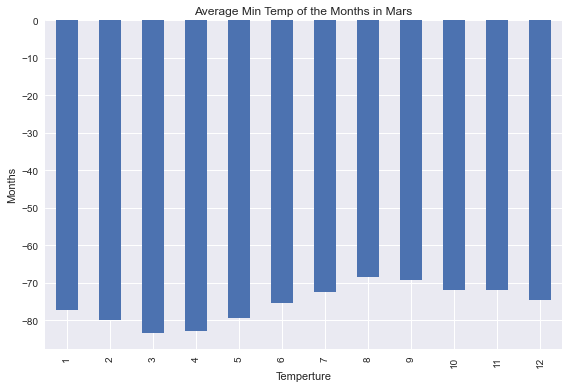

In [129]:
months_avg = mars_df.groupby("month").mean()
months_avg["min_temp"].plot(kind = 'bar', title = "Average Min Temp of the Months in Mars")
plt.xlabel("Temperture")
plt.ylabel("Months")
plt.tight_layout()
#plt.gca().invert_yaxis()
plt.show()

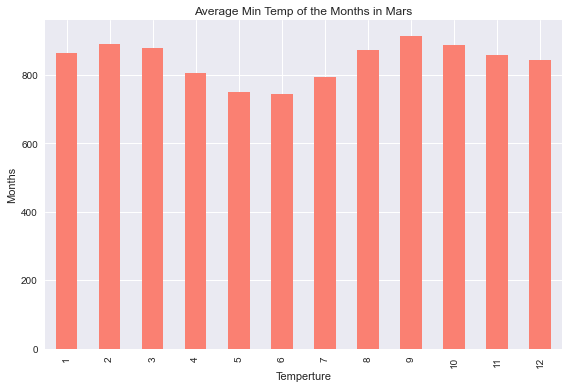

In [130]:
months_avg = mars_df.groupby("month").mean()
months_avg["pressure"].plot(kind = 'bar', title = "Average Min Temp of the Months in Mars", color = "salmon")
plt.xlabel("Temperture")
plt.ylabel("Months")
plt.tight_layout()
plt.show()

In [131]:
#320 start
#954 end
mars_yr_df = mars_df[(mars_df["id"] >= 320) & (mars_df["id"] <= 954)]
last_day = mars_yr_df[mars_yr_df["id"] == 954].iat[0,1]
first_day = mars_yr_df[mars_yr_df["id"] == 320].iat[0,1]
total = last_day - first_day
print(f"It takes about {total.days} Earth days for it to be one full year in Mars")

It takes about 687 Earth days for it to be one full year in Mars


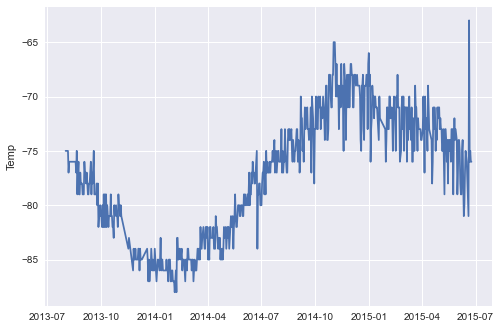

In [132]:
plt.plot(mars_yr_df["terrestrial_date"], mars_yr_df["min_temp"])
plt.ylabel("Temp")
plt.show()

In [133]:
mars_df.to_csv("mars_temperature_data.csv", index=False)